<a href="https://colab.research.google.com/github/adityasbg/pytoch_basic/blob/main/pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn


In [14]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


## Creating data
### Train test split

In [41]:
X , y =datasets.make_circles(n_samples=1000,  noise=0.03,random_state=42, factor=0.8)


## Binary classification problem

Plot data

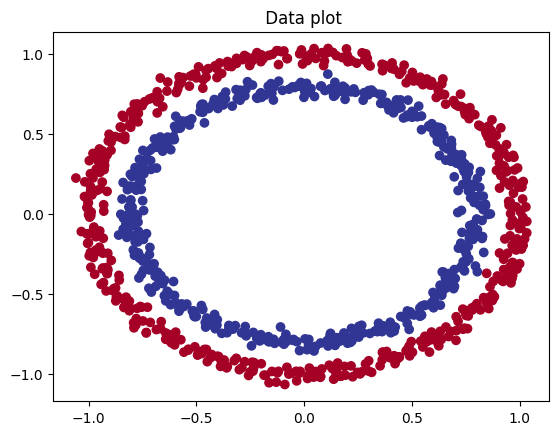

In [42]:

plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);
plt.title(" Data plot")
plt.show()

In [43]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [44]:
X_train[:5] ,y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

Creating model

In [146]:
class Classification(nn.Module):

  def __init__(self ):
    super().__init__()
    self.dense1 = nn.Linear(2 , 10)
    self.dense2 = nn.Linear(10 , 10)
    self.dense3 = nn.Linear(10 , 1)
    self.relu = nn.ReLU()

  def forward( self,x ):
    d1 = self.relu(self.dense1(x))
    d2 = self.relu(self.dense2(d1))
    d3 = self.dense3(d2)

    return d3




In [147]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model =Classification().to(device)

model


Classification(
  (dense1): Linear(in_features=2, out_features=10, bias=True)
  (dense2): Linear(in_features=10, out_features=10, bias=True)
  (dense3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [148]:
torch.manual_seed(42)
model(X_train[:2].to(device))

tensor([[0.0229],
        [0.0156]], grad_fn=<AddmmBackward0>)

. Define loss </br>
. Define optimizer

In [149]:
# learning rate
lr =0.01

# logloss + sigmoid
bce =nn.BCEWithLogitsLoss()

# for turning logits to 0-1
sigmod = nn.Sigmoid()

# optimizer
optim = torch.optim.Adam( params = model.parameters() , lr = lr )

In [150]:
def accuracy(y_pred_prob , y_target):

  y_pred_label=torch.where(y_pred_prob > 0.5 , 1 ,0 )
  correct =torch.eq(y_pred_label,y_target).sum().item()
  return correct / len(y_pred_label) * 100





# training loop

In [151]:
epoch = 100
torch.manual_seed(42)

for i in range (epoch):

  # forward pass
  y_train_logit =model(X_train).squeeze()

  # loss
  loss=bce(y_train_logit ,y_train )
  train_accuracy =accuracy(sigmod(y_train_logit) ,y_train )
  # zero grad

  optim.zero_grad()

  # backward pass

  loss.backward()

  # step optimizer

  optim.step()

  model.eval()
  if i% 10 ==0:
    with torch.inference_mode():
      y_test_logit =model(X_test).squeeze()
      test_loss=bce(y_test_logit ,y_test )
      test_accuracy =accuracy(sigmod(y_test_logit) ,y_test )

      print (f"""epoch: {i} | train_loss: { loss:.5f} | train accuracy: {train_accuracy:.5f} | test loss: {test_loss:.5f} | test accuracy: {test_accuracy:.5f} """)




epoch: 0 | train_loss: 0.69295 | train accuracy: 50.00000 | test loss: 0.69203 | test accuracy: 55.50000 
epoch: 10 | train_loss: 0.68651 | train accuracy: 53.00000 | test loss: 0.68401 | test accuracy: 56.50000 
epoch: 20 | train_loss: 0.67698 | train accuracy: 53.50000 | test loss: 0.67149 | test accuracy: 57.00000 
epoch: 30 | train_loss: 0.66078 | train accuracy: 60.75000 | test loss: 0.65295 | test accuracy: 62.00000 
epoch: 40 | train_loss: 0.63241 | train accuracy: 66.87500 | test loss: 0.62340 | test accuracy: 70.00000 
epoch: 50 | train_loss: 0.58509 | train accuracy: 74.25000 | test loss: 0.57695 | test accuracy: 76.50000 
epoch: 60 | train_loss: 0.52041 | train accuracy: 81.50000 | test loss: 0.52935 | test accuracy: 81.00000 
epoch: 70 | train_loss: 0.43584 | train accuracy: 90.75000 | test loss: 0.45495 | test accuracy: 89.00000 
epoch: 80 | train_loss: 0.33954 | train accuracy: 96.50000 | test loss: 0.35861 | test accuracy: 95.50000 
epoch: 90 | train_loss: 0.24768 | trai